# FashionMNIST Using Pytorch
* **References: The code in this notebook is taken from the deep learning course by [PadhAI](https://padhai.onefourthlabs.in/).**

## Outline

* Downloading dataset (Fashion MNIST)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [0]:
#import lib
import torch
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (3,3))

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

## Data loading

In [0]:
import torchvision
import torchvision.transforms as transforms

#setup training set
#transforming the PIL Image to tensors
trainset = torchvision.datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transforms.ToTensor())

0it [00:00, ?it/s]

26427392it [00:02, 10704941.10it/s]                             


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 70045.47it/s]                            
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 3160862.33it/s]                            
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 26092.33it/s]            

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
#loading the training data from trainset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True)

In [0]:
#sneak peak into the train data

#iterating into the data
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape) #shape of all 4 images
print(images[1].shape) #shape of one image
print(labels[1].item()) #label number

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
7


## Visualise data

In [0]:
#taking the first image from batch of 4 images

img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [0]:
#convert the tensor to numpy for displaying the image
npimg = img.numpy()
print(npimg.shape)

(1, 28, 28)


In [0]:
#for displaying the image, shape of the image should be height * width * channels
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(28, 28, 1)


In [0]:
np.squeeze(npimg).shape

(28, 28)

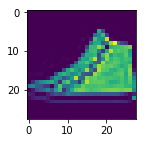

In [0]:
plt.figure(figsize = (2,2))
plt.imshow(np.squeeze(npimg))
plt.show()

In [0]:
classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')

def imshow(img):
    npimg = img.numpy() #convert the tensor to numpy for displaying the image
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #for displaying the image, shape of the image should be height * width * channels
    plt.show()

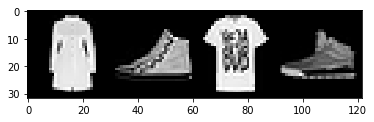

Coat Sneaker T-Shirt Sneaker


In [0]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [0]:
import torch.nn as nn

In [0]:
class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        #single layer convolution
        self.conv1 = nn.Conv2d(1, 16, 3, padding = (1,1), stride = (2, 2))
    
    def forward(self, x):
        #execute forward pass
        x = self.conv1(x)
        return(x)

In [0]:
#create a object of class
net = FirstCNN()

In [0]:
#print summary of network
print(net)

FirstCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)


In [0]:
#input shape
images.shape

torch.Size([4, 1, 28, 28])

In [0]:
#output from the convolution
out = net(images)
out.shape

torch.Size([4, 16, 14, 14])

In [0]:
#total parameters in a network
for param in net.parameters():
    print(param.shape, "Parameters")

torch.Size([16, 1, 3, 3]) Parameters
torch.Size([16]) Parameters


In [0]:
#plotting the output of convolution, taking the first channel
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(14, 14)


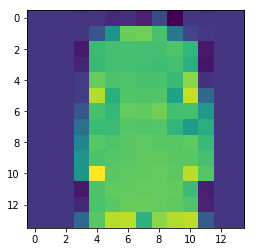

<Figure size 20000x20000 with 0 Axes>

In [0]:
#display the output in the first layer

plt.imshow(out[0, 0, :, :].detach().numpy())
plt.figure(figsize = (10,10), dpi = 2000)
plt.show()


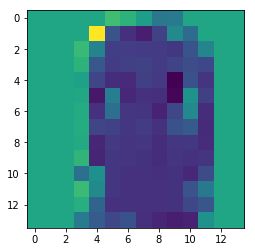

<Figure size 720x720 with 0 Axes>

In [0]:
#looking into the layer output, second layer output

plt.imshow(out[0, 1, :, :].detach().numpy())
plt.figure(figsize = (10,10))
plt.show()

## Deep Convolutional Network

In [0]:
#creating custom convolution network using two blocks of 2D convolution
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        #create a cnn using nn.sequential
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),   # (N, 1, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [0]:
#create a class object and pass the input images to it.
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 24, 24])

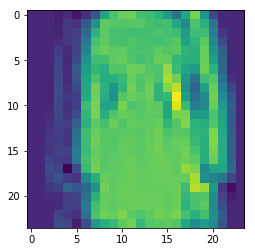

In [0]:
#visualize the convolution layer
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
#in this class, we will use AvgPool for averge pooling - sub sampling
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 6, 5),          # (N, 1, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(kernel_size = 2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [0]:
#create a class object and pass the input images to it.
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 4, 4])

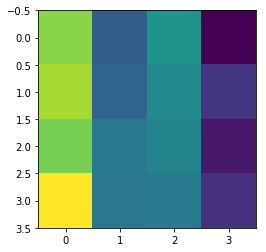

In [0]:
#visualize the layer outputs
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

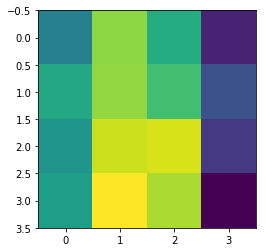

In [0]:
plt.imshow(out[0, 1, :, :].detach().numpy())
plt.show()

## LeNet

- Tanh Activation

In [0]:
#class implementing the lenet network
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size = 5), #(N, 1, 28, 28) -> (N, 6, 24, 24)
            nn.Tanh(),
            nn.AvgPool2d(2, stride = 2), #(N, 6, 24, 24) -> (N, 6, 12, 12)
            
            nn.Conv2d(6, 16, kernel_size = 5), #(N, 6, 12, 12) -> (N, 6, 8, 8)
            nn.Tanh(),
            nn.AvgPool2d(2, stride = 2)) #(N, 6, 8, 8) -> (N, 16, 4, 4)
    
        self.fc_model = nn.Sequential(
            nn.Linear(256, 120), # (N, 256) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120, 84), # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84, 10))  # (N, 84)  -> (N, 10))
            
    def forward(self, x):
        #print(x.shape)
        x = self.cnn_model(x)
        #print(x.shape)
        #print(x)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc_model(x)
        #print(x.shape)
        return x

In [0]:
net = LeNet()
#running the lenet cnn
out = net(images)

In [0]:
#printing the class probabilities for 4 different images
print(out)

tensor([[-0.0640,  0.1498, -0.1436, -0.0763,  0.0496,  0.0011, -0.1011, -0.0966,
          0.0568, -0.0271],
        [-0.0470,  0.1197, -0.1052, -0.0833,  0.0124,  0.0239, -0.0796, -0.0615,
          0.0176, -0.0425],
        [-0.0677,  0.1336, -0.1360, -0.0762,  0.0470,  0.0095, -0.0797, -0.0866,
          0.0385, -0.0213],
        [-0.0515,  0.1153, -0.1038, -0.0766,  0.0112,  0.0185, -0.0835, -0.0528,
          0.0261, -0.0288]], grad_fn=<AddmmBackward>)


In [0]:
#taking only the maximum value 
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([1, 1, 1, 1])


## Training LeNet

In [0]:
#increase the batch size
batch_size = 128

#download the data again and set the train, test loader with different batch size
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
def evaluation(dataloader):
  #function to calculate the accuracy
    total, correct = 0, 0
    for data in dataloader:
        #get the input and labels from data
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        #calculate the accuracy
        correct += (pred == labels).sum().item()
        
    return(100 * correct/total)

In [0]:
#create an object of LeNet class, 
net = LeNet()

In [0]:
import torch.optim as optim

#define the loss function 
loss_fn = nn.CrossEntropyLoss()
#using the adam optimizer for backpropagation
opt = optim.Adam(net.parameters())

Epoch: 0/10, Test acc: 78.97, Train acc: 80.42
Epoch: 1/10, Test acc: 81.15, Train acc: 82.73
Epoch: 2/10, Test acc: 83.33, Train acc: 84.54
Epoch: 3/10, Test acc: 85.51, Train acc: 86.86
Epoch: 4/10, Test acc: 85.71, Train acc: 86.97
Epoch: 5/10, Test acc: 85.68, Train acc: 87.36
Epoch: 6/10, Test acc: 87.04, Train acc: 88.66
Epoch: 7/10, Test acc: 87.57, Train acc: 89.32
Epoch: 8/10, Test acc: 87.67, Train acc: 89.37
Epoch: 9/10, Test acc: 87.45, Train acc: 89.48


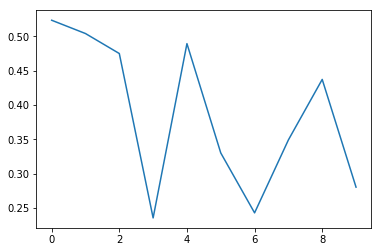

CPU times: user 5min 25s, sys: 7.94 s, total: 5min 33s
Wall time: 5min 34s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10 #epoch count

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        
        #forward pass
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        
        #backward and optimize
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [0]:
#reference a variable to gpu card
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
#function to do evaluation (calculate the accuracy) in gpu
def evaluation(dataloader):
    total, correct = 0, 0
    
    #keeping the network in evaluation mode
    net.eval()
    for data in dataloader:
        inputs, labels = data
        #moving the inputs and labels to gpu
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
#create the model object and move it to GPU
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/10, Test acc: 78.73, Train acc: 79.72
Epoch: 1/10, Test acc: 81.99, Train acc: 83.54
Epoch: 2/10, Test acc: 83.87, Train acc: 85.14
Epoch: 3/10, Test acc: 84.31, Train acc: 85.94
Epoch: 4/10, Test acc: 86.05, Train acc: 87.41
Epoch: 5/10, Test acc: 86.24, Train acc: 88.15
Epoch: 6/10, Test acc: 86.72, Train acc: 88.80
Epoch: 7/10, Test acc: 86.90, Train acc: 88.88
Epoch: 8/10, Test acc: 87.21, Train acc: 89.21
Epoch: 9/10, Test acc: 87.55, Train acc: 89.78


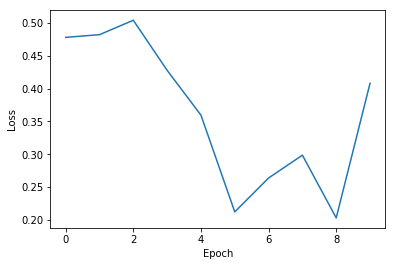

CPU times: user 3min 3s, sys: 5.82 s, total: 3min 9s
Wall time: 3min 10s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10

for epoch in range(max_epochs):
    #iterate through all the batches in each epoch
    for i, data in enumerate(trainloader, 0):
        
        #keeping the network in training mode
        net.train()
    
        inputs, labels = data
        #moving the input and labels to gpu
        inputs, labels = inputs.to(device), labels.to(device)
        #clear the gradients
        opt.zero_grad()
        #forward pass
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        #backward pass
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [0]:
#test on testing data

print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 87.55, Train acc: 89.78


## Basic Visualisation

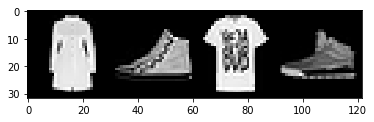

In [0]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [0]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [0]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 24, 24])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


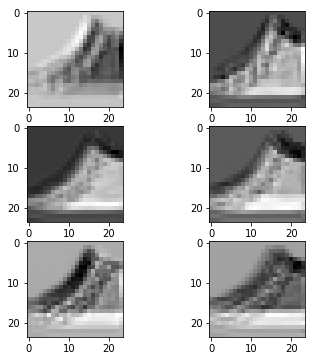

In [0]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

## Exercises

* Modify LeNet to work with ReLU instead of Tanh -> What is the impact on training time, final loss
* We have observed over-fitting -> Use weight_decay in torch.optim to add L2 regularisation


## LeNet With ReLU

In [0]:
#Used ReLU non-linear activation instead of tanh

class LeNet_ReLU(nn.Module):
    def __init__(self): 
        super(LeNet_ReLU, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [0]:
#Train using the GPU
net = LeNet_ReLU().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/50, Test acc: 38.93, Train acc: 38.79
Epoch: 1/50, Test acc: 44.68, Train acc: 44.95
Epoch: 2/50, Test acc: 48.49, Train acc: 48.98
Epoch: 3/50, Test acc: 50.51, Train acc: 50.94
Epoch: 4/50, Test acc: 52.35, Train acc: 53.19
Epoch: 5/50, Test acc: 53.86, Train acc: 54.95
Epoch: 6/50, Test acc: 54.55, Train acc: 56.49
Epoch: 7/50, Test acc: 55.66, Train acc: 57.41
Epoch: 8/50, Test acc: 55.77, Train acc: 58.64
Epoch: 9/50, Test acc: 56.74, Train acc: 59.68
Epoch: 10/50, Test acc: 57.34, Train acc: 60.67
Epoch: 11/50, Test acc: 57.26, Train acc: 60.91
Epoch: 12/50, Test acc: 58.62, Train acc: 62.58
Epoch: 13/50, Test acc: 58.45, Train acc: 62.61
Epoch: 14/50, Test acc: 59.20, Train acc: 64.26
Epoch: 15/50, Test acc: 59.73, Train acc: 65.15
Epoch: 16/50, Test acc: 59.01, Train acc: 65.08
Epoch: 17/50, Test acc: 59.46, Train acc: 65.91
Epoch: 18/50, Test acc: 60.11, Train acc: 67.43
Epoch: 19/50, Test acc: 59.73, Train acc: 67.28
Epoch: 20/50, Test acc: 59.42, Train acc: 67.60
Ep

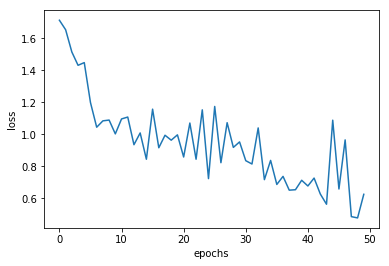

CPU times: user 9min 39s, sys: 15.4 s, total: 9min 54s
Wall time: 9min 55s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 50

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("")
plt.show()    

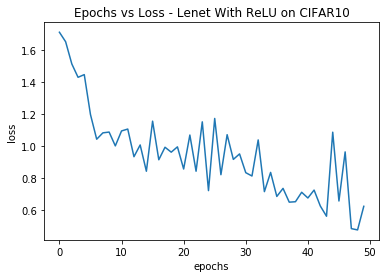

In [0]:
plt.plot(loss_epoch_arr)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Epochs vs Loss - Lenet With ReLU on CIFAR10")
plt.show()   

In [0]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 60.62, Train acc: 79.40


## Adding L2 Regularization
- From the above loss plot we can see that it is overfitting the data, so we will apply L2 regularization using weight_decay in optim

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()

#weight_decay = L2
optimizer_l2 = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-5)

#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Epoch: 0/50, Test acc: 28.61, Train acc: 28.83
Epoch: 1/50, Test acc: 33.28, Train acc: 33.06
Epoch: 2/50, Test acc: 35.30, Train acc: 35.13
Epoch: 3/50, Test acc: 36.74, Train acc: 36.84
Epoch: 4/50, Test acc: 37.42, Train acc: 37.52
Epoch: 5/50, Test acc: 38.54, Train acc: 38.57
Epoch: 6/50, Test acc: 38.96, Train acc: 39.10
Epoch: 7/50, Test acc: 39.21, Train acc: 39.74
Epoch: 8/50, Test acc: 40.36, Train acc: 40.46
Epoch: 9/50, Test acc: 40.85, Train acc: 40.95
Epoch: 10/50, Test acc: 41.27, Train acc: 41.78
Epoch: 11/50, Test acc: 41.80, Train acc: 41.94
Epoch: 12/50, Test acc: 42.16, Train acc: 42.76
Epoch: 13/50, Test acc: 43.00, Train acc: 43.40
Epoch: 14/50, Test acc: 43.05, Train acc: 43.66
Epoch: 15/50, Test acc: 44.27, Train acc: 44.58
Epoch: 16/50, Test acc: 44.60, Train acc: 45.17
Epoch: 17/50, Test acc: 45.57, Train acc: 45.88
Epoch: 18/50, Test acc: 45.94, Train acc: 46.16
Epoch: 19/50, Test acc: 46.30, Train acc: 46.65
Epoch: 20/50, Test acc: 47.01, Train acc: 47.15
Ep

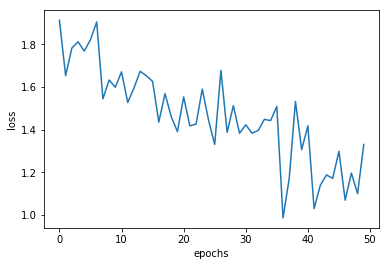

CPU times: user 9min 36s, sys: 14.7 s, total: 9min 51s
Wall time: 9min 52s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 50

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):
      
        # get the inputs
        inputs, labels = data
        
        #move inputs to gpu
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer_l2.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer_l2.step()
        
        #store loss value for loss plot
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("")
plt.show()    

In [0]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))